In [26]:
import numpy as np
import matplotlib.pyplot as plt

import os
from tqdm import tqdm
from PIL import Image

import visu
import utils

from importlib import reload

In [9]:
cw_pair = [
    (1, 0), (1, 2), (1, 8), (1, 10),
    (2, 0), (2, 2), (2, 8), (2, 10),
    (3, 0), (3, 2), (3, 8), (3, 10),
    (4, 0), (4, 2), (4, 8), (4, 10),
    (5, 0), (5, 2), (5, 8), (5, 10),
    (6, 0), (6, 2), (6, 8), (6, 10),
    (7, 0), (7, 2), (7, 8), (7, 10),
    (8, 0), (8, 10)
]

# Spec result

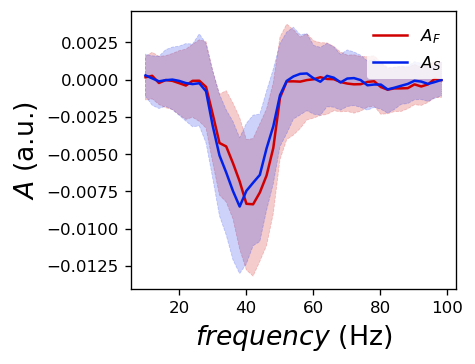

In [3]:
spec = utils.load_pickle("./data/spec_mfast/spec_100.pkl")
fig = visu.show_spec_summary(spec)

In [ ]:
data_dir = "./data/spec_mfast"
fdir = "./figs/spec_mfast"

xl_fit = [5, 80]
xl_show = [5, 80]

yl_set = [[0, 0], [0, 0]]
cid_prv = 1
wid_prv_set = []
for cid, wid in tqdm(cw_pair + [[-1, -1]]):
    # cumulate figs and set ylim
    if cid != cid_prv:
        for wid_prv in wid_prv_set:
            
            spec_data = utils.load_pickle(os.path.join(data_dir, "spec_%d%02d.pkl"%(cid_prv, wid_prv)))
            
            fig = visu.show_spec_summary(spec_data, yl=yl_set[0], xlb=None, ylb=None, xl=xl_show)
            plt.savefig(os.path.join(fdir, "spec_%d%02d.png"%(cid_prv, wid_prv)), bbox_inches="tight")
            plt.clf()
            
        wid_prv_set = []
        cid_prv = cid
        yl_set = [[0, 0], [0, 0]]
        
        plt.close()
        
    if cid == -1: continue
    
    spec_data = utils.load_pickle(os.path.join(data_dir, "spec_%d%02d.pkl"%(cid, wid)))
    
    fig = visu.show_spec_summary(spec_data, xl=xl_fit)
    yl = fig.gca().get_ylim()
    if yl[0] < yl_set[0][0]: yl_set[0][0] = yl[0]
    if yl[1] > yl_set[0][1]: yl_set[0][1] = yl[1]
    fig.clf()
    
    wid_prv_set.append(wid)
    
plt.clf()

In [19]:
fig_bck, coords = visu.gen_background()
wl = 0.002

for cid, wid in cw_pair:
    nc = cid-1
    nw = visu.orders.index(wid)
    
    fname = os.path.join(fdir, "spec_%d%02d.png"%(cid, wid))
    im_te = Image.open(fname)
    
    c = coords[nc][nw]
    fig_bck.add_axes([c[0]+wl, c[1]+wl, c[2]-2*wl, c[3]-2*wl])
    plt.sca(fig_bck.axes[-1])
    plt.imshow(im_te)
    plt.axis("off")
    
plt.savefig(os.path.join(fdir, "summary.png"), dpi=400, bbox_inches="tight")
plt.clf()

<Figure size 3200x1800 with 0 Axes>

# TE result

In [89]:
amp_range = utils.load_pickle("./data/osc_motif_mfast/amp_range_set.pkl")["amp_range_set"]

fpeaks = [[-1, (ar["fpop"][1][0]+ar["fpop"][1][1])/2] for ar in amp_range]
fpeaks[0] = [-1, 36]
fpeaks[5] = [-1, 68]

tcut = [min(max(2*1e3/fp[1], 30), 40) for fp in fpeaks]

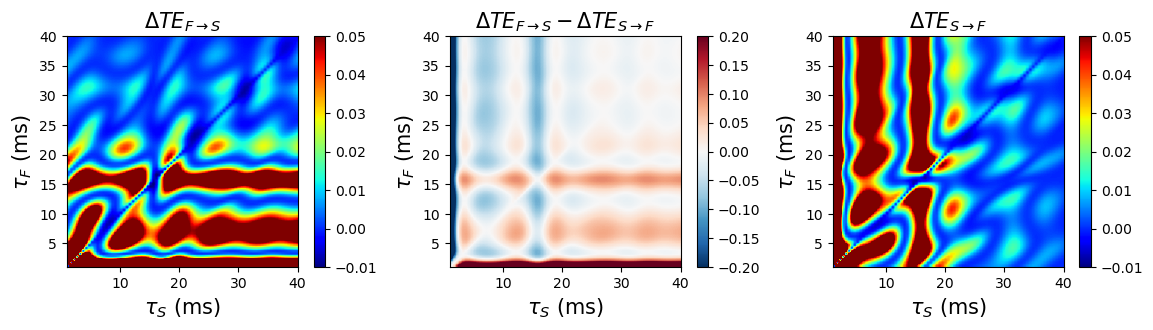

In [90]:
te_data_2d = utils.load_pickle("./data/te_2d_mfast/te_810.pkl")
fig = visu.show_te_summary_2d(te_data_2d, vmax=0.05, vmin=-.01, vdmax=0.2)

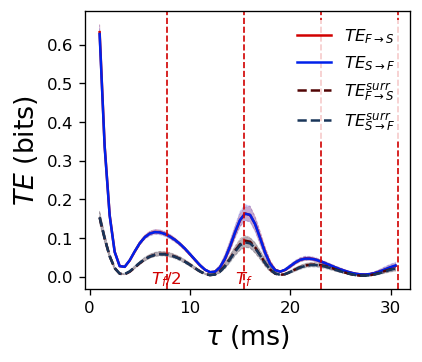

In [91]:
te_data = utils.reduce_te_2d(te_data_2d, tcut=tcut[7])

fig = visu.show_te_summary(te_data)
visu.draw_freq_indicator(f0_set=[-1, 65])

In [ ]:
data_dir = "./data/te_2d_mfast/"
fdir = "./figs/te_2d_mfast/"

xl_fit = [5, 41]
# xl_show = [0, 41]

yl_set = [[0, 0], [0, 0]]
cid_prv = 1
wid_prv_set = []
for cid, wid in tqdm(cw_pair + [[-1, -1]]):
    # cumulate figs and set ylim
    if cid != cid_prv:
        for wid_prv in wid_prv_set:
            
            xl_show = [0, tcut[cid_prv-1]]
            
            te_data_2d = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid_prv, wid_prv)))
            te_data = utils.reduce_te_2d(te_data_2d, tcut=tcut[cid_prv-1])
            
            f0_set = fpeaks[cid_prv-1]
            # real
            fig = visu.show_te_summary(te_data, yl=yl_set[0], xlb=None, ylb=None, xl=xl_show)
            visu.draw_freq_indicator(yl=yl_set[0], f0_set=f0_set)
            plt.savefig(os.path.join(fdir, "te_%d%02d.png"%(cid_prv, wid_prv)), bbox_inches="tight")
            plt.clf()
            
            # sbtracted
            fig = visu.show_te_summary(te_data, yl=yl_set[1], subtract_surr=True, xlb=None, ylb=None, xl=xl_show)
            visu.draw_freq_indicator(yl=yl_set[0], f0_set=f0_set)
            plt.savefig(os.path.join(fdir, "te_subt_%d%02d.png"%(cid_prv, wid_prv)), bbox_inches="tight")
            plt.clf()
            
        wid_prv_set = []
        cid_prv = cid
        yl_set = [[0, 0], [0, 0]]
        plt.close()
        
    if cid == -1: continue

    te_data_2d = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid, wid)))
    te_data = utils.reduce_te_2d(te_data_2d, tcut=tcut[cid-1])
    
    fig = visu.show_te_summary(te_data, xl=xl_fit)
    yl = fig.gca().get_ylim()
    if yl[0] < yl_set[0][0]: yl_set[0][0] = yl[0]
    if yl[1] > yl_set[0][1]: yl_set[0][1] = yl[1]
    fig.clf()
    
    fig = visu.show_te_summary(te_data, subtract_surr=True, xl=xl_fit)
    yl = fig.gca().get_ylim()
    if yl[0] < yl_set[1][0]: yl_set[1][0] = yl[0]
    if yl[1] > yl_set[1][1]: yl_set[1][1] = yl[1]
    fig.clf()
    
    wid_prv_set.append(wid)
    

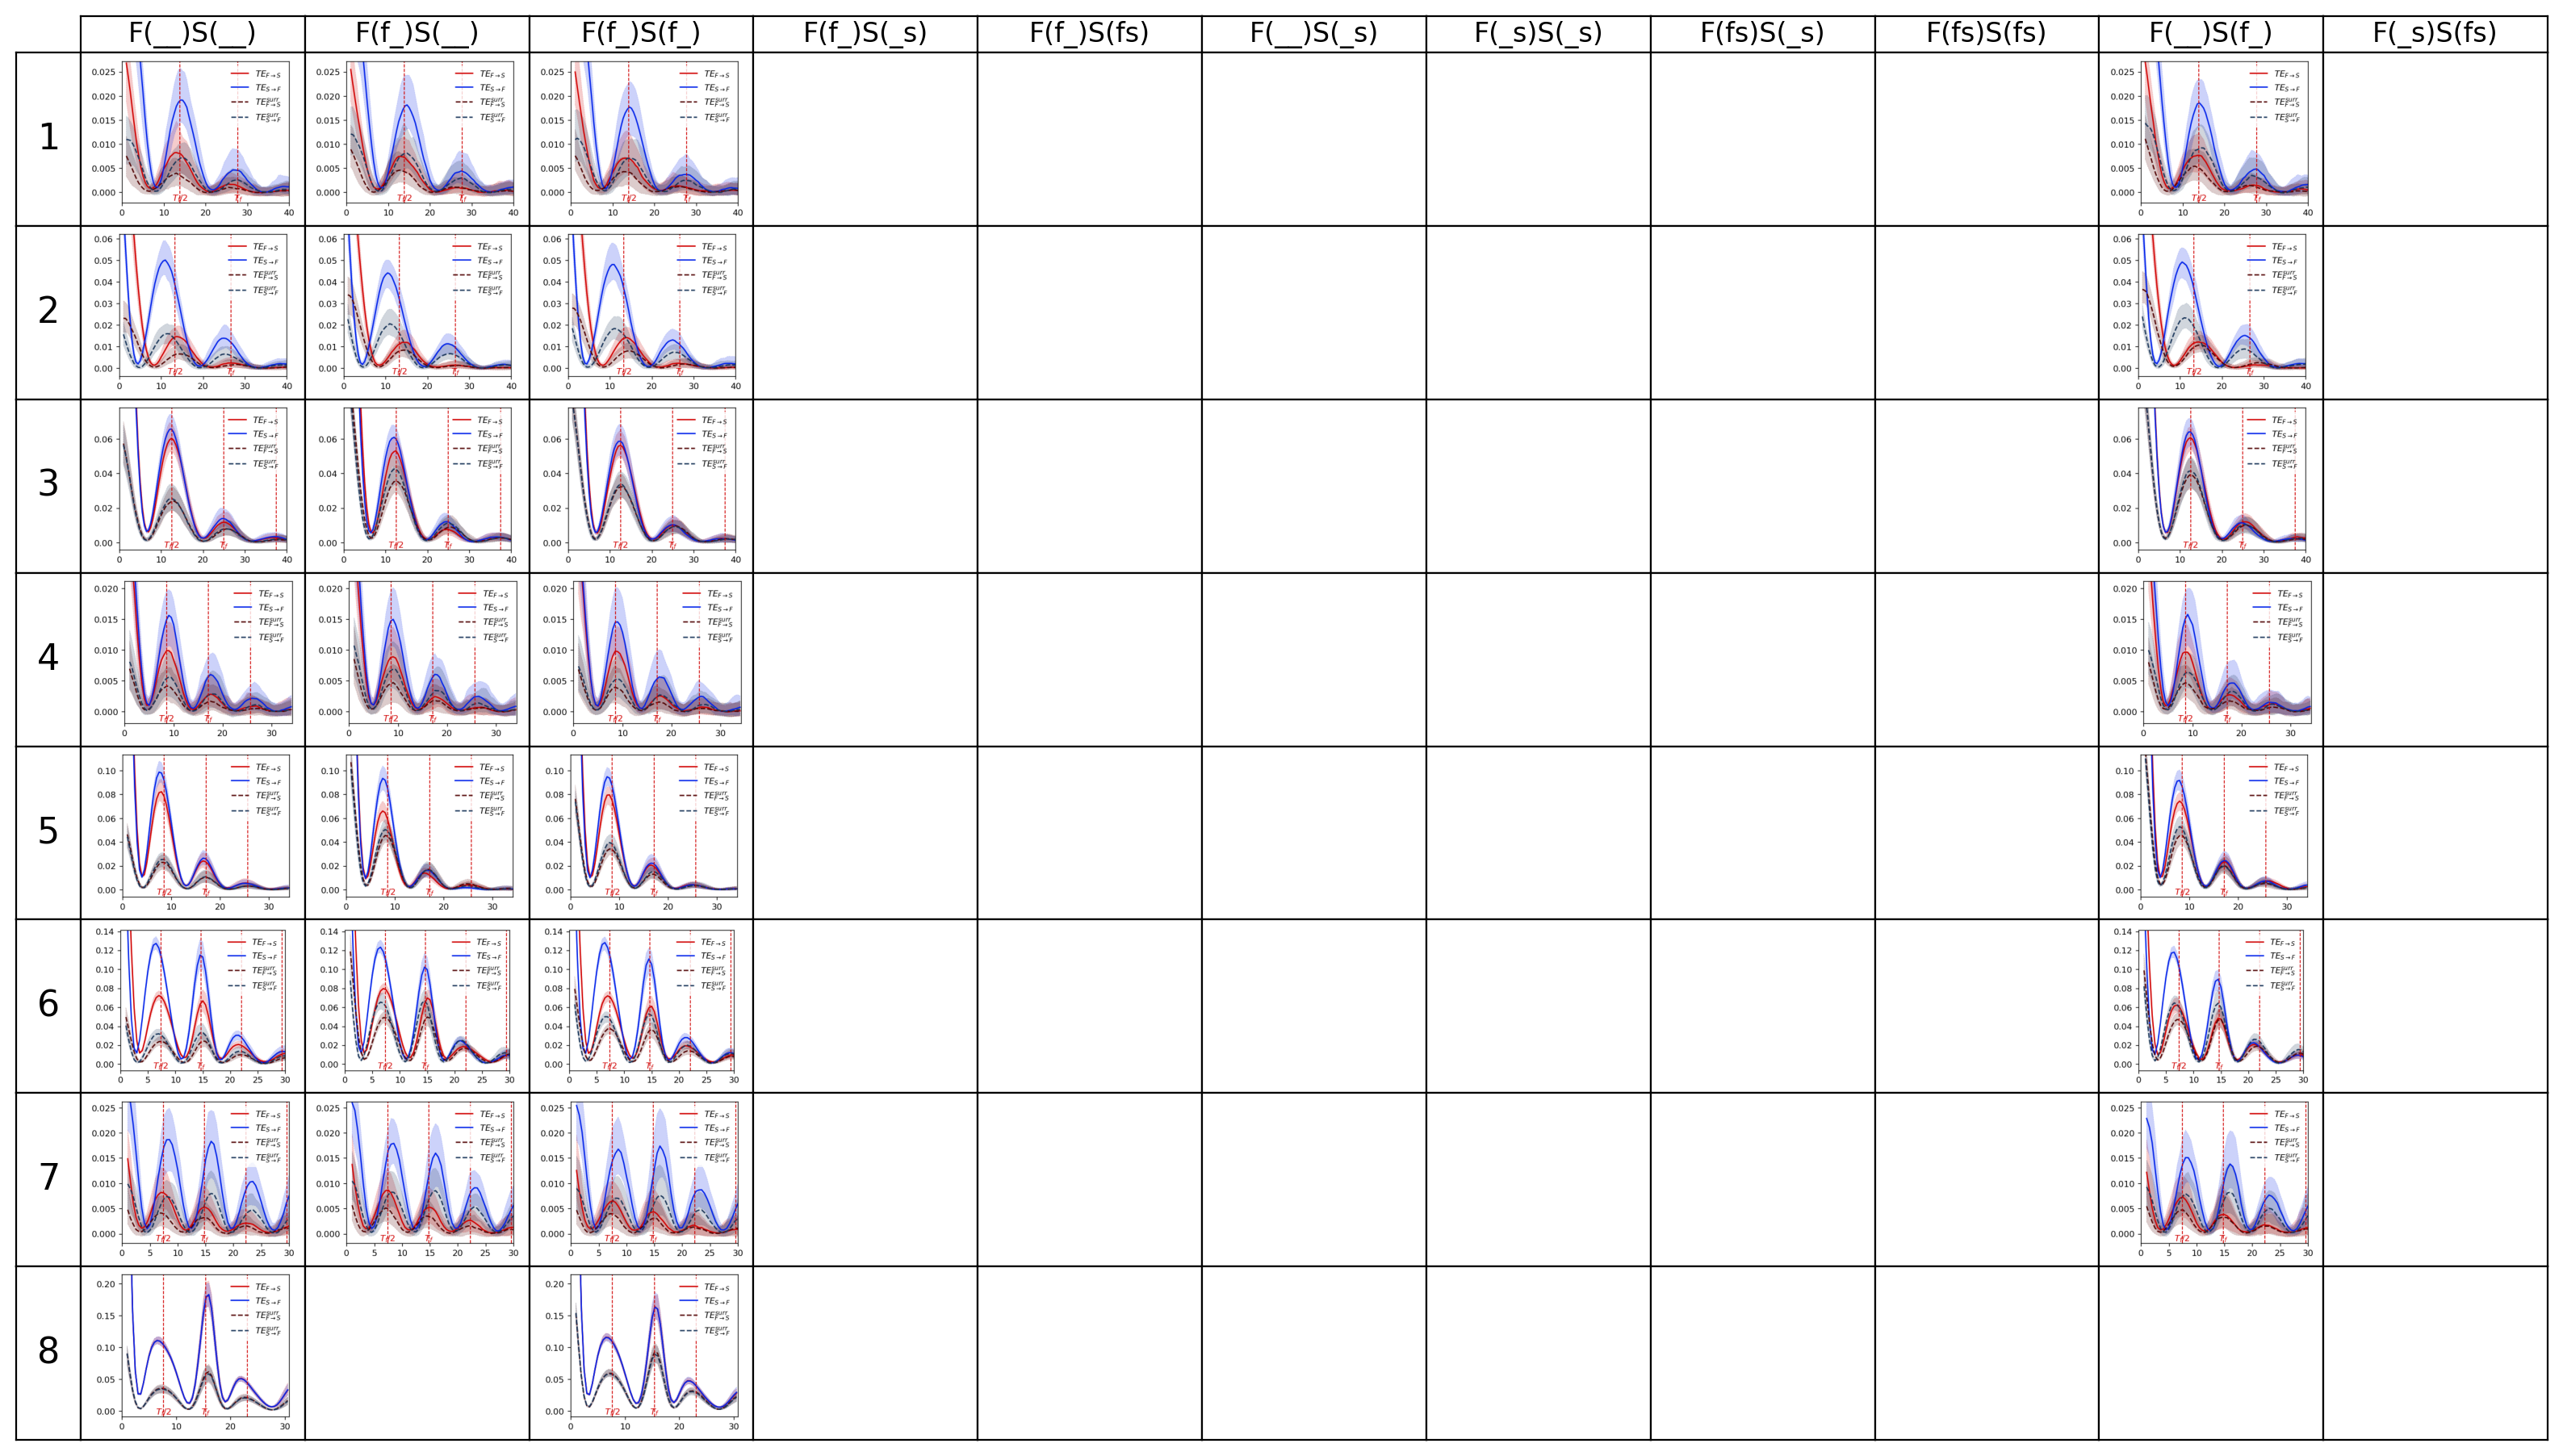

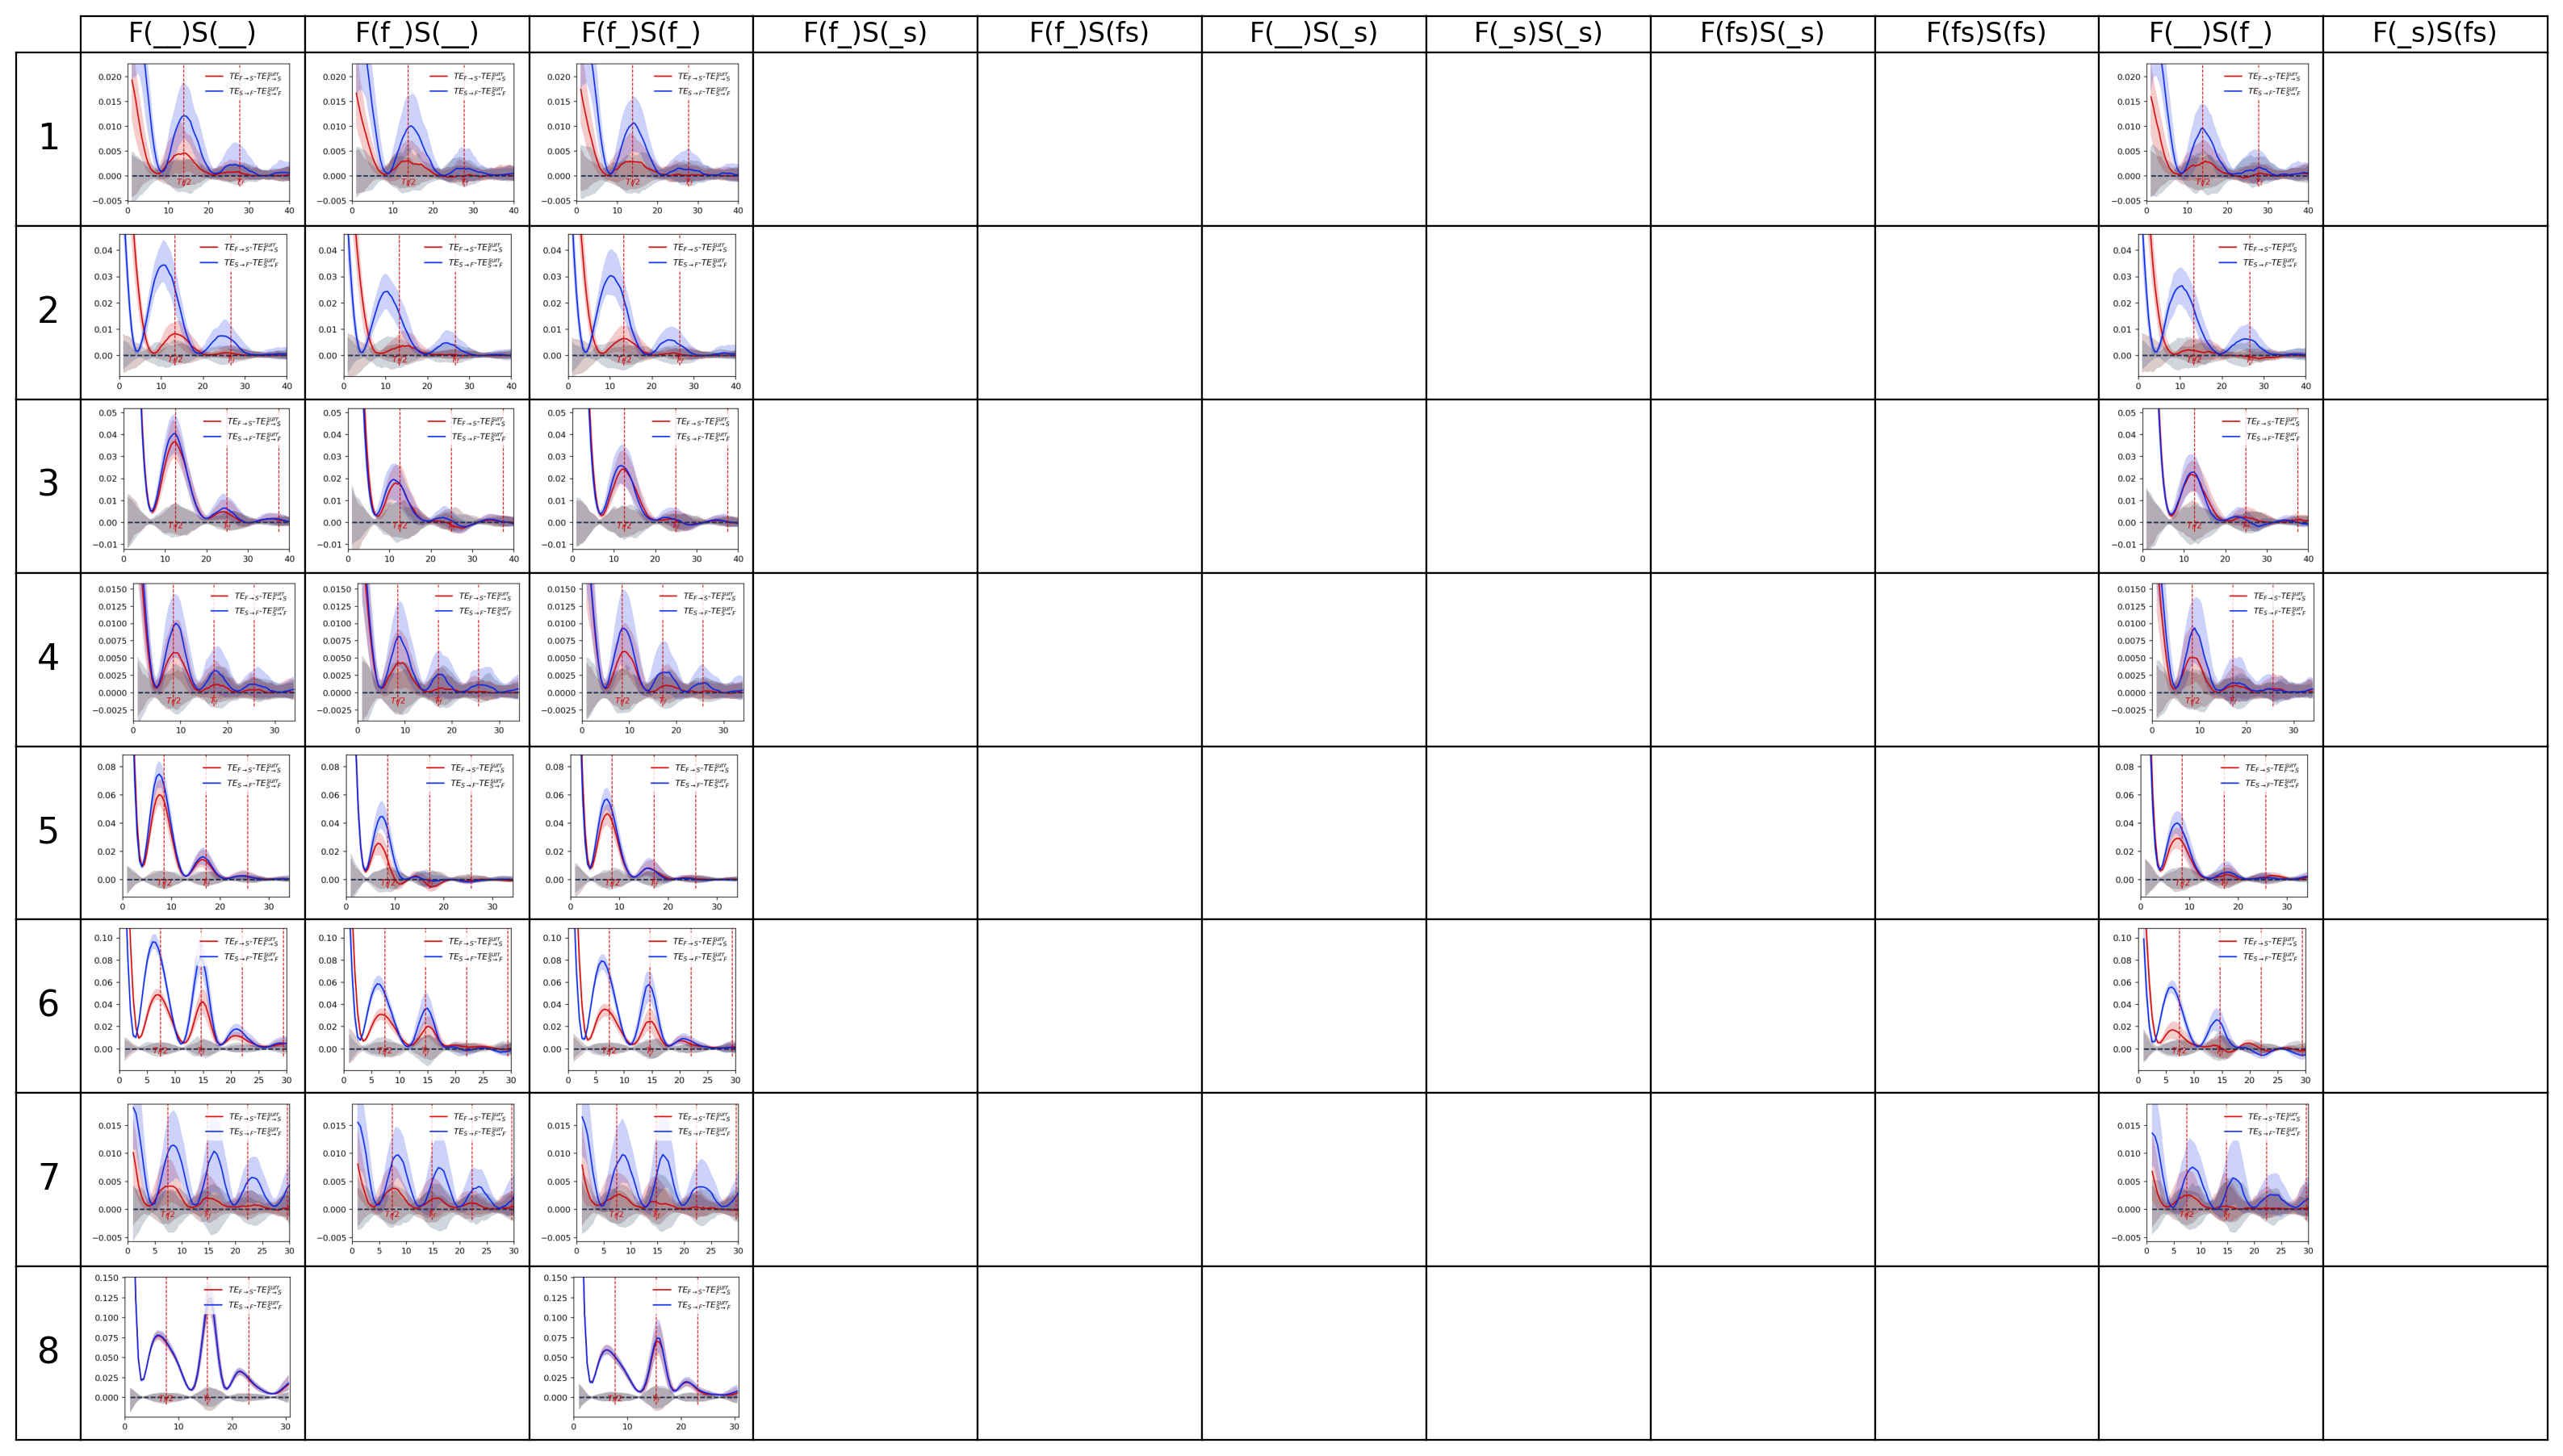

In [102]:
wl = 0.002
for tag in ("", "_subt"):

    fig_bck, coords = visu.gen_background()
    for cid, wid in cw_pair:
        nc = cid-1
        nw = visu.orders.index(wid)

        fname = os.path.join(fdir, "te%s_%d%02d.png"%(tag, cid, wid))
        im_te = Image.open(fname)

        c = coords[nc][nw]
        fig_bck.add_axes([c[0]+wl, c[1]+wl, c[2]-2*wl, c[3]-2*wl])
        plt.sca(fig_bck.axes[-1])
        plt.imshow(im_te)
        plt.axis("off")

    plt.savefig(os.path.join(fdir, "summary%s.png"%(tag)), dpi=400, bbox_inches="tight")

# Barcode

In [105]:
import tebarcode as tb

In [ ]:
data_dir = "./data/te_2d_mfast/"
fdir = "./figs/te_barcode_mfast/"

for cid, wid in tqdm(cw_pair):
    te_data_2d = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid, wid)))
    te_data = utils.reduce_te_2d(te_data_2d, tcut=tcut[cid-1])

    te_base = utils.load_pickle(os.path.join(data_dir, "te_%d%02d.pkl"%(cid, 0)))
    te_base = utils.reduce_te_2d(te_base, tcut=tcut[cid-1])

    binfo = tb.get_barcode(te_data)
    binfo_boost = tb.get_barcode_boost(te_data, te_base)
    
    prefix = os.path.join(fdir, "te%d%02d"%(cid, wid))
    tag_set = ("_barcode.png", "_barcode(k).png", "_barcode(b).png", "_barcode(bk).png")
    vmax_set = (None, None, 50, 50)
    binfo_set = (binfo, binfo, binfo_boost, binfo_boost)
    for n in range(4):
        fig, _ = visu.draw_barcode(binfo_set[n], cmap="RdBu_r", vmax=vmax_set[n],
                                   show_pline=bool(n%2), show_cbar=bool(n//2),
                                   xlb=None, figsize=(5, 1))
        visu.draw_freq_indicator(h=-0.15, lw=1, f0_set=fpeaks[cid-1])
        plt.savefig(prefix+tag_set[n], bbox_inches="tight")
        fig.clf()
    plt.close()

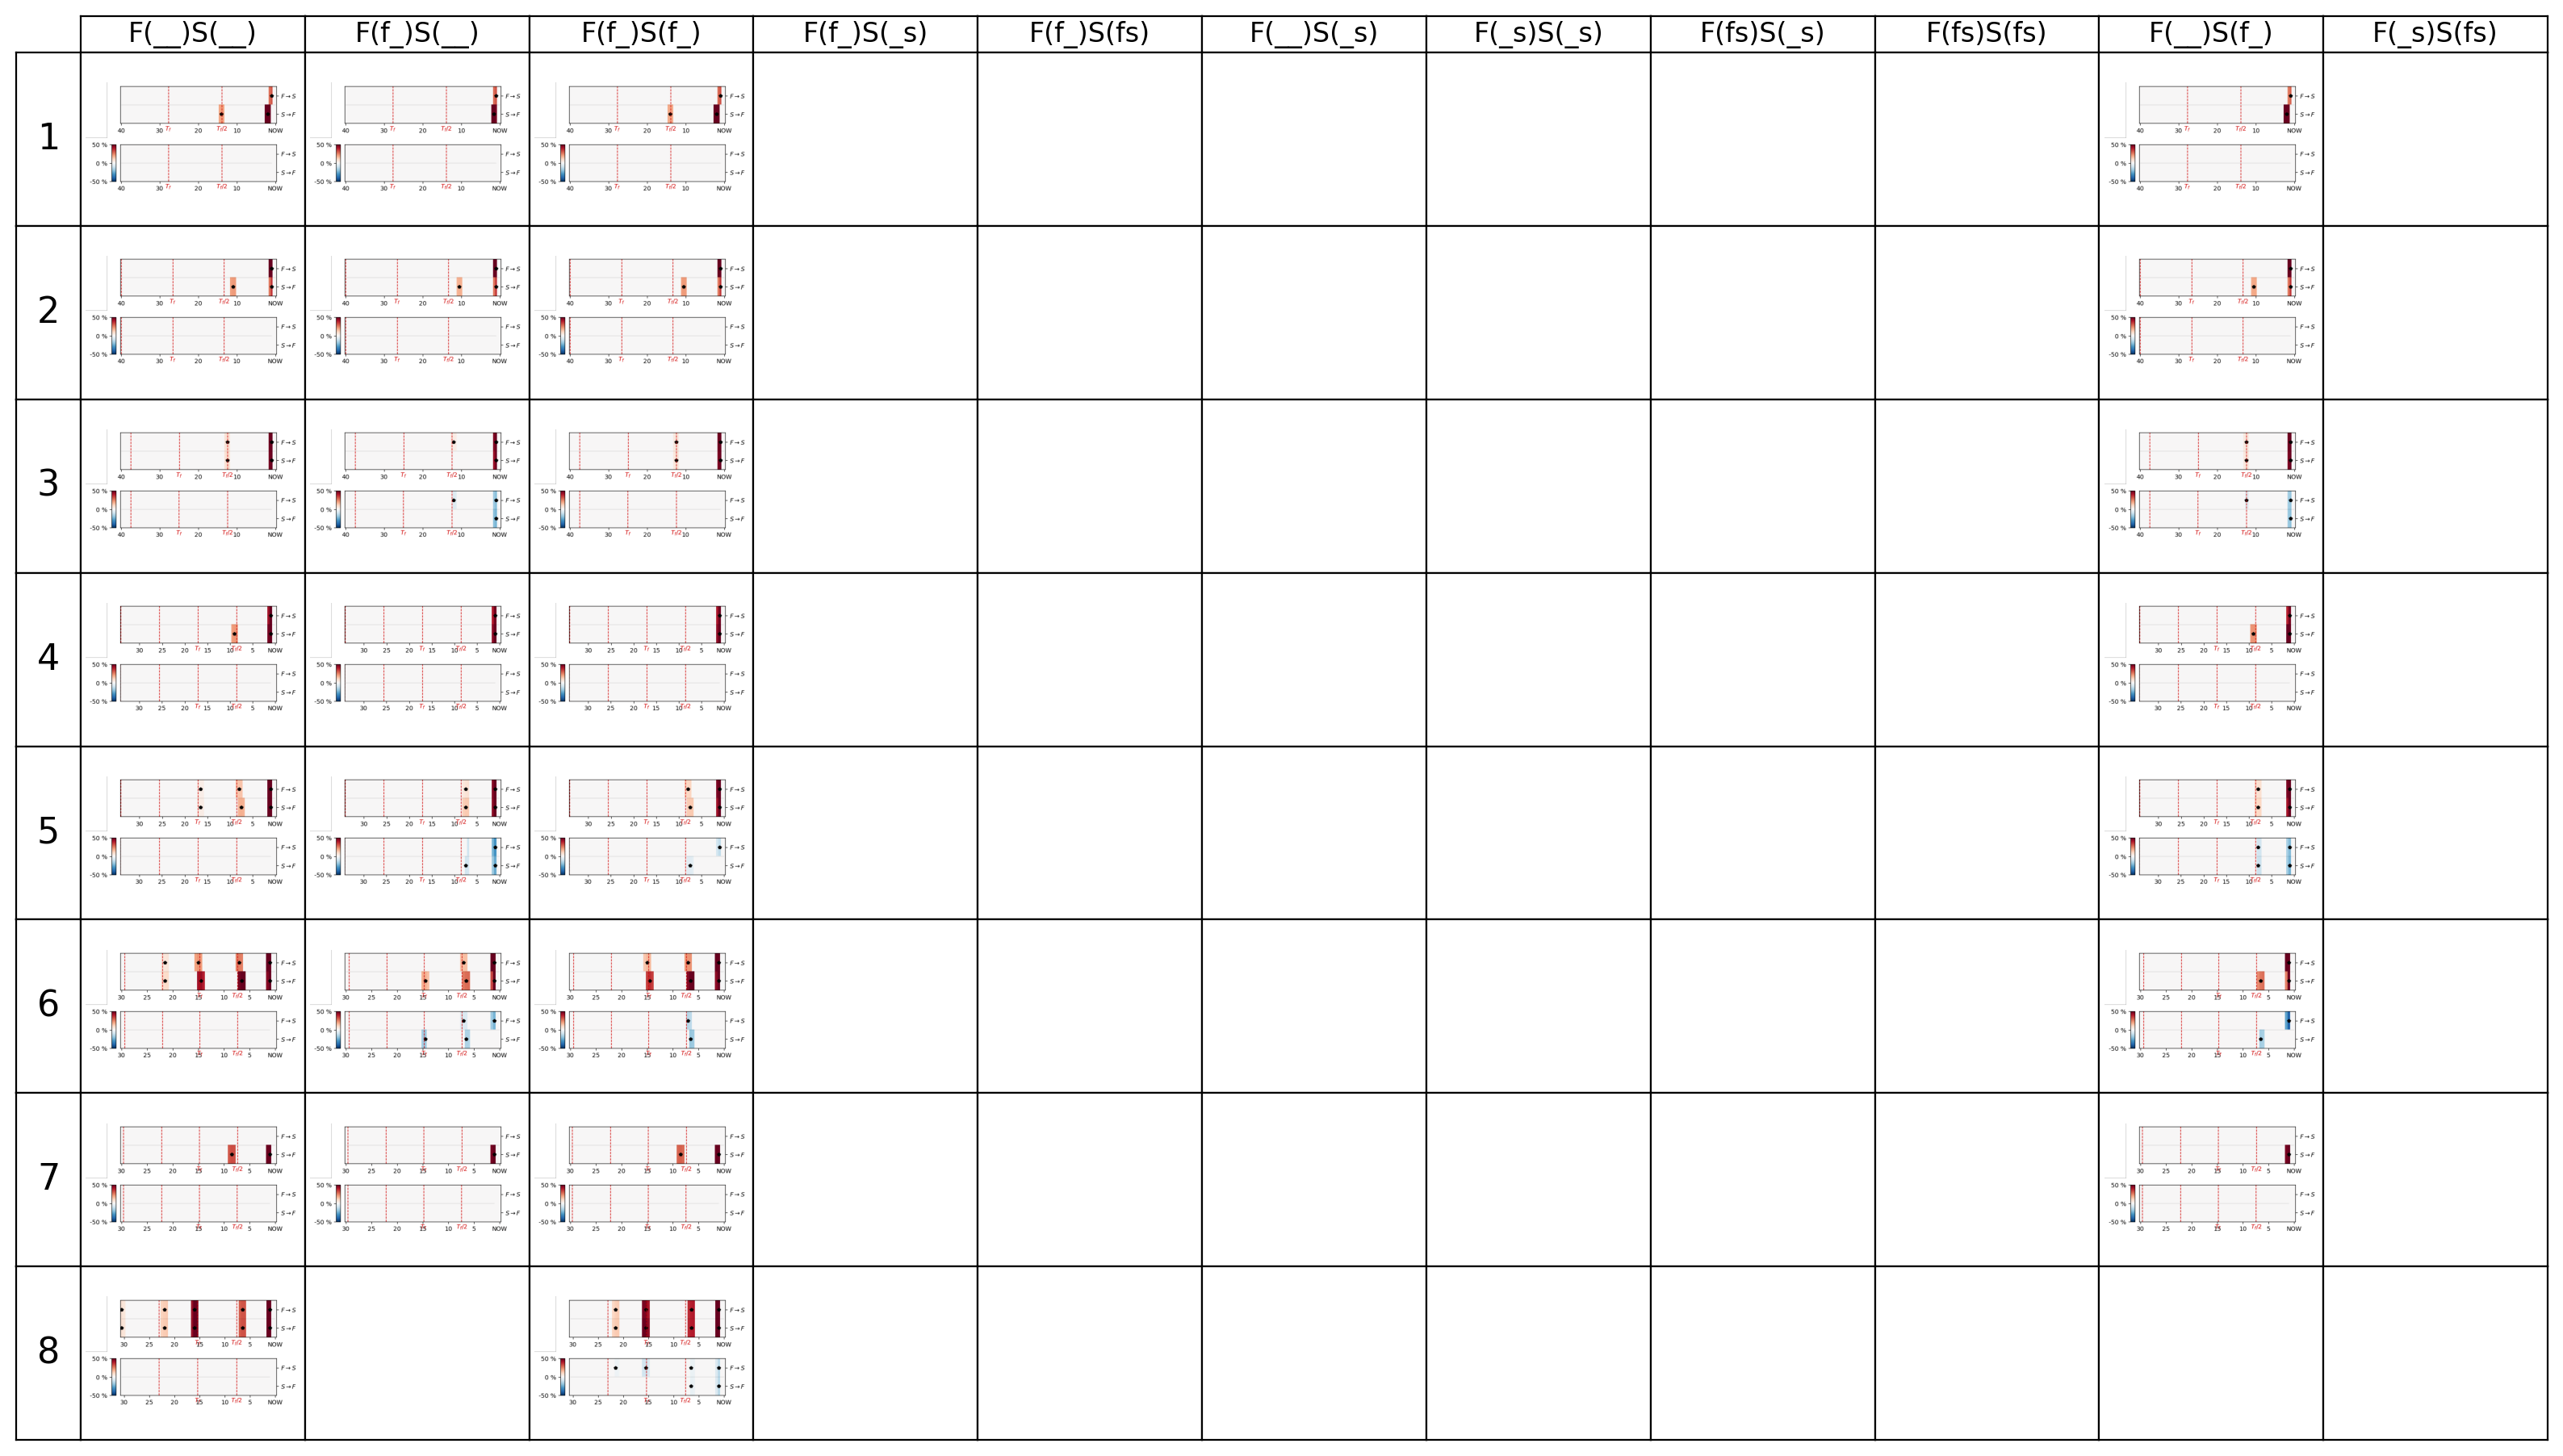

In [110]:
fig_dir = "./figs/te_barcode_mfast/"

fig_bck, coords = visu.gen_background()
for cid, wid in cw_pair:
    nc = cid-1
    nw = visu.orders.index(wid)

    fname = os.path.join(fig_dir, "te%d%02d_barcode.png"%(cid, wid))
    im1 = Image.open(fname)
    
    fname = os.path.join(fig_dir, "te%d%02d_barcode(b).png"%(cid, wid))
    im2 = Image.open(fname)

    sz1 = list(np.shape(im1))
    sz2 = list(np.shape(im2))

    sz = [sz1[0], sz2[1]-sz1[1], sz1[2]]
    im_blank = np.zeros(sz)
    im_cat = np.vstack((np.hstack((im_blank, im1)), im2)).astype(int)

    c = coords[nc][nw]
    fig_bck.add_axes([c[0]+wl, c[1]+wl, c[2]-2*wl, c[3]-2*wl])
    plt.sca(fig_bck.axes[-1])
    plt.imshow(im_cat)
    plt.axis("off")
    
    im1.close()
    im2.close()

plt.savefig(os.path.join(fig_dir, "summary.png"), dpi=400, bbox_inches="tight")